In [2]:
import tensorflow as tf
import tensorflow.keras
import datetime
from tensorflow.keras.models import Model, load_model
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.layers import Activation, Input, Reshape, UpSampling2D, Conv2D, Conv1D, Dense, Dropout, BatchNormalization, Flatten, Conv2DTranspose
import numpy as np
from skimage import io, color
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from skimage import io, color, transform
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
import os
image_size = 128

now = datetime.datetime.now()

def read_image(img_id, dir):
    try:
        img = load_img(dir + "/" + img_id, target_size=(image_size,image_size))
        img = img_to_array(img)
        return img
    except:
        return None

def convLayer(input, filters, kernel_size, dilation=1, stride=1):
    return Conv2D(filters, kernel_size, padding="same", activation="relu", dilation_rate=dilation, strides=stride)(input)

model = load_model("/home/carlos/Image_Colorization/output/2019-02-01--11h31m/model.h5")

Listed inputs
Readied inputs
Predicted inputs


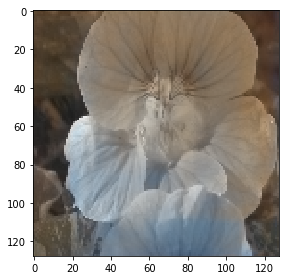

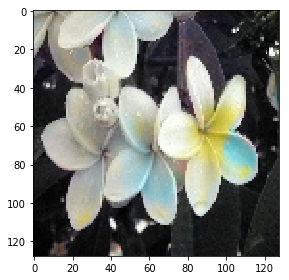

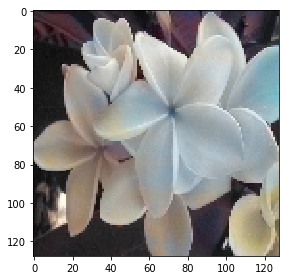

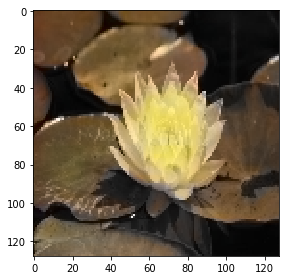

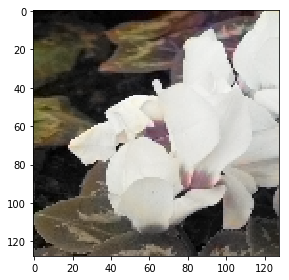

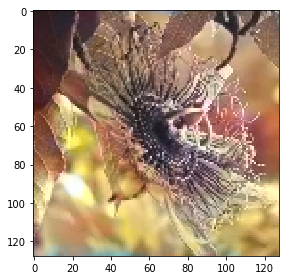

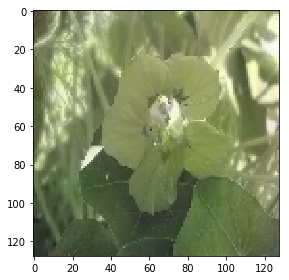

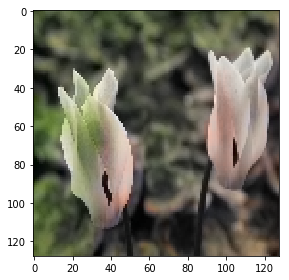

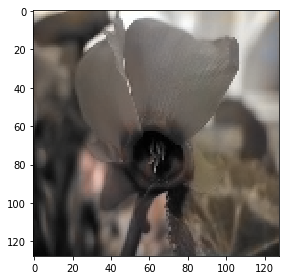

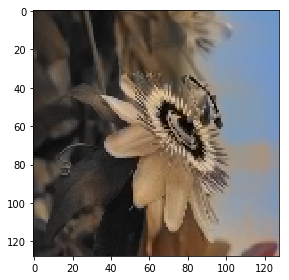

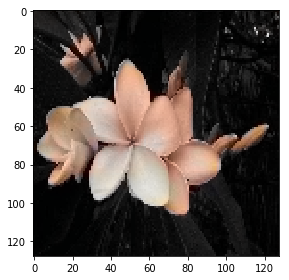

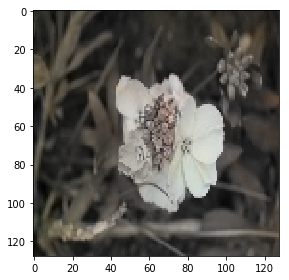

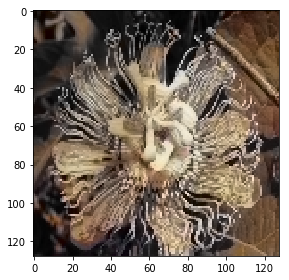

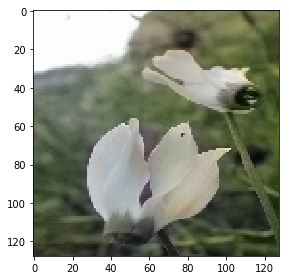

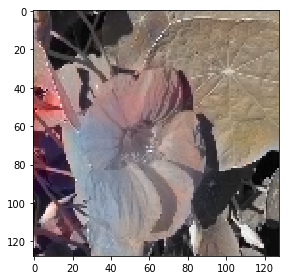

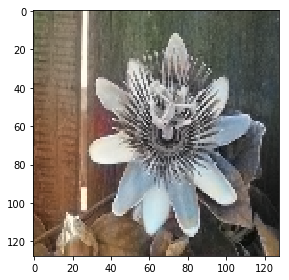

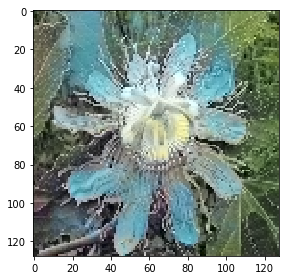

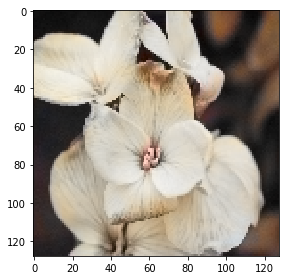

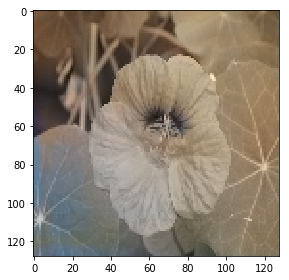

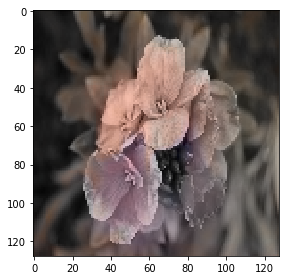

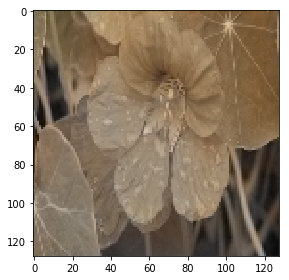

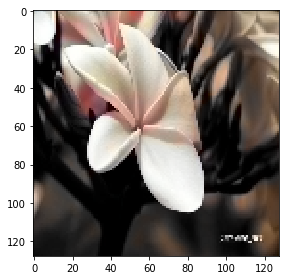

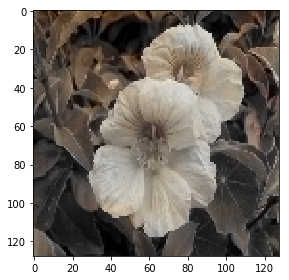

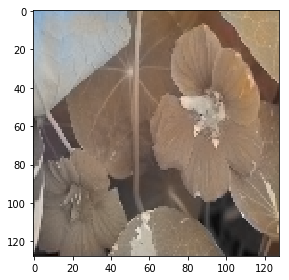

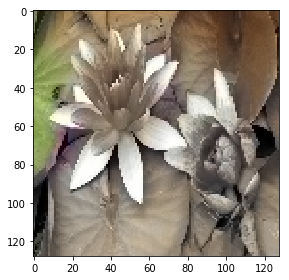

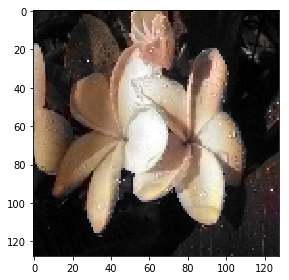

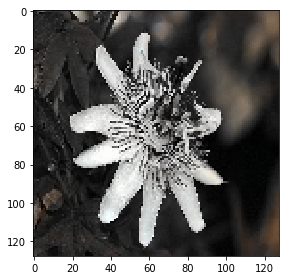

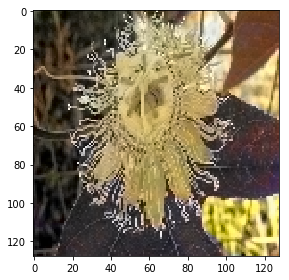

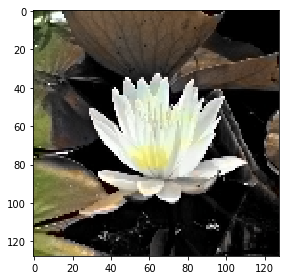

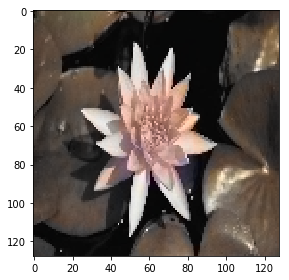

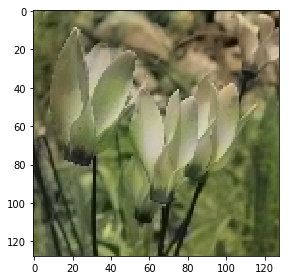

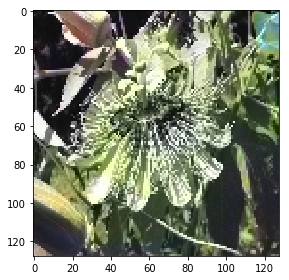

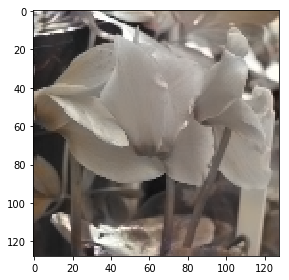

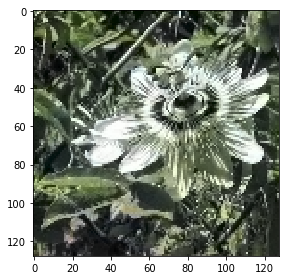

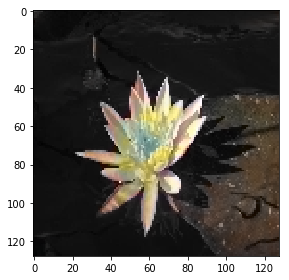

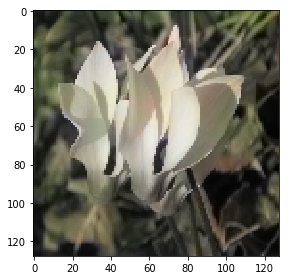

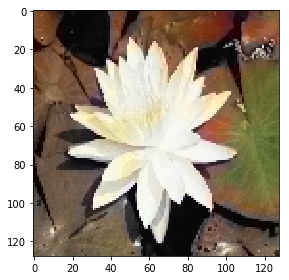

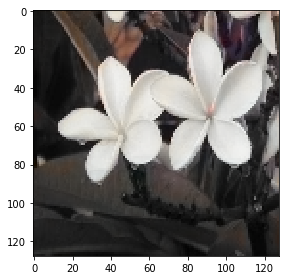

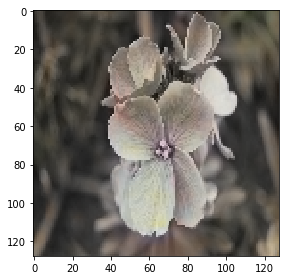

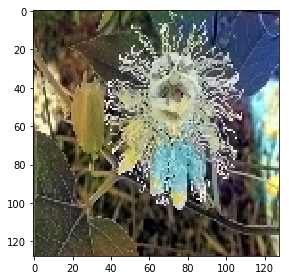

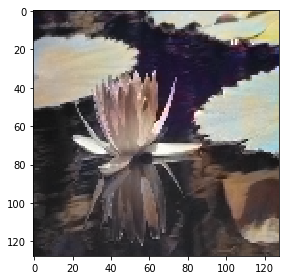

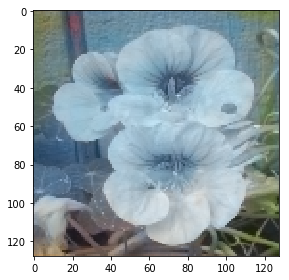

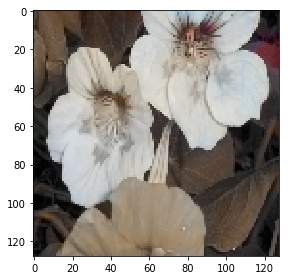

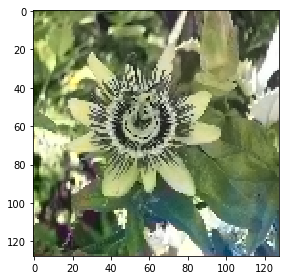

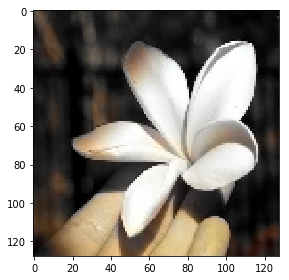

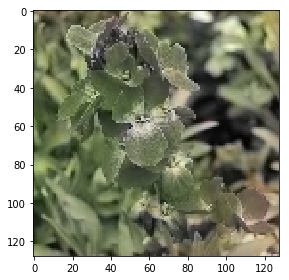

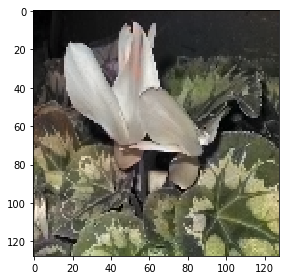

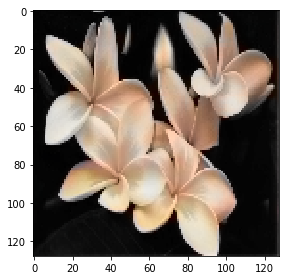

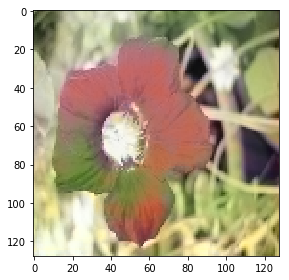

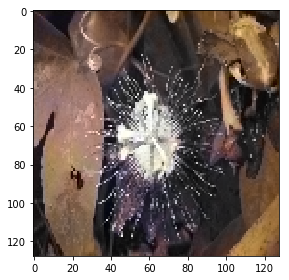

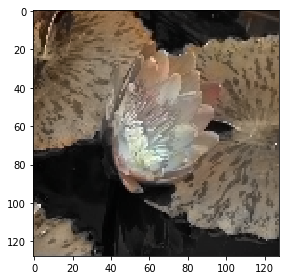

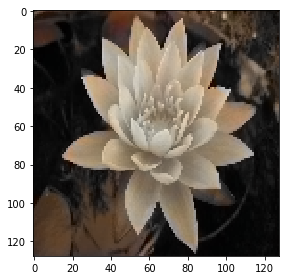

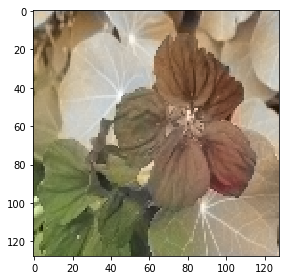

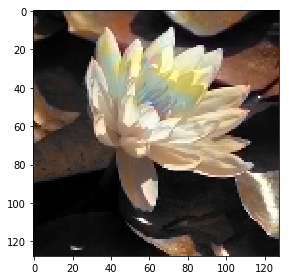

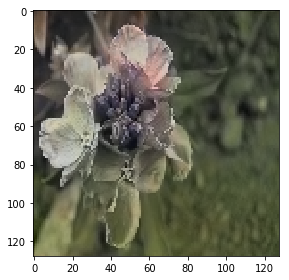

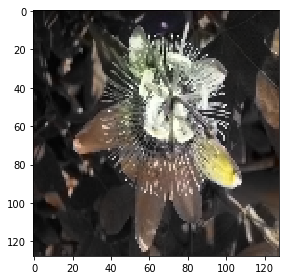

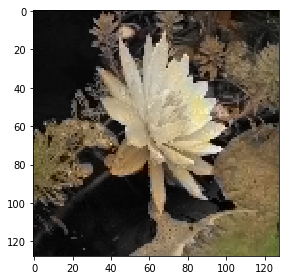

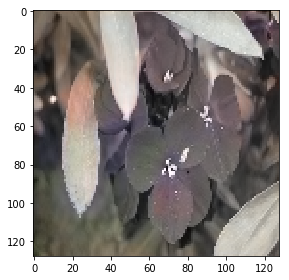

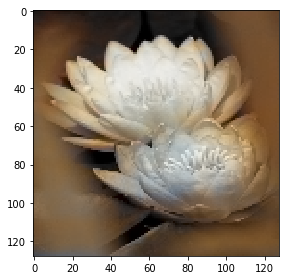

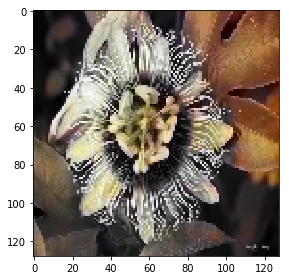

In [6]:
directory = "/home/carlos/Image_Colorization/data/flowers_val/flowers_val"
files = [f for f in os.listdir(directory)[:60] if os.path.isfile(os.path.join(directory, f))]
Xtest = []
for image in files:
    img = read_image(image, directory)
    if not img is None:
        img = np.array(img, dtype=float)
        Xtest.append(img)

print("Listed inputs")
buckets = np.load("../model/pts_in_hull.npy")
Xtest = np.array(Xtest, dtype=float)
Xtest = 1.0/255*Xtest
inputs = color.rgb2lab(Xtest)[:, :, :, 0]
inputs_2 = inputs - 50
inputs_2 = inputs_2 / 50
inputs_2 = inputs_2.reshape(inputs_2.shape+(1,))
inputs = inputs.reshape(inputs.shape+(1,))
print("Readied inputs")
# Test model
output = model.predict(inputs_2)
output = output.reshape(60, image_size, image_size, 313)
print("Predicted inputs")
# Output colorizations
for i in range(len(output)):
    cur = np.zeros((image_size, image_size, 3))
    cur[:,:,0] = inputs[i][:,:,0]
    values = np.arange(0, 313)
    t = 0.38
    transformed = np.exp(np.log(output[i] + 1e-8)/t)
    sum_colors = np.expand_dims(np.sum(transformed, axis=2), axis=2)
    result = transformed/sum_colors
    cur[:,:,1:] = np.dot(result, buckets)
#     cur[:,:,1:] = buckets[np.argmax(output[i], axis=2)]
    cur = color.lab2rgb(cur)
    io.imshow(cur)
    plt.show()
#     io.imsave("/home/carlos/Image_Colorization/output/2019-01-30--12h44m/test/"+files[i], cur)

In [135]:
y=70
x=110
print(np.mean(output[0][y, x, ]))
values = np.partition(output[0][y, x, ], -10)[-10:]
print(values)
ind = np.argpartition(output[0][y, x, ], -10)[-10:]
ind

0.0031948881
[0.02411826 0.02539543 0.02962189 0.02660119 0.0309341  0.04414878
 0.03201155 0.03338315 0.04714946 0.04967513]


array([200, 179, 197, 177, 220, 219, 178, 218, 199, 198])

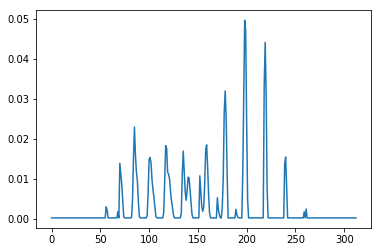

In [136]:
plt.plot(output[0][y, x, ])
plt.show()

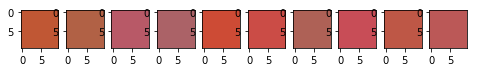

In [138]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
for i in range(1, columns+1):
    img = np.zeros((h, w, 3))
    img[:, :, 0] = 50
    img[:, :, 1:] = buckets[ind[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(color.lab2rgb(img))
plt.show()